# PBL6


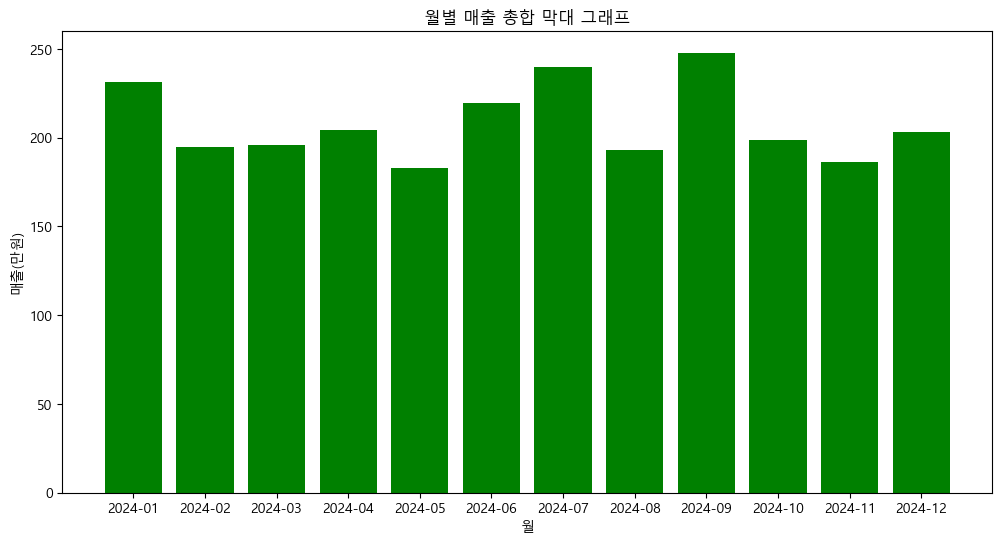

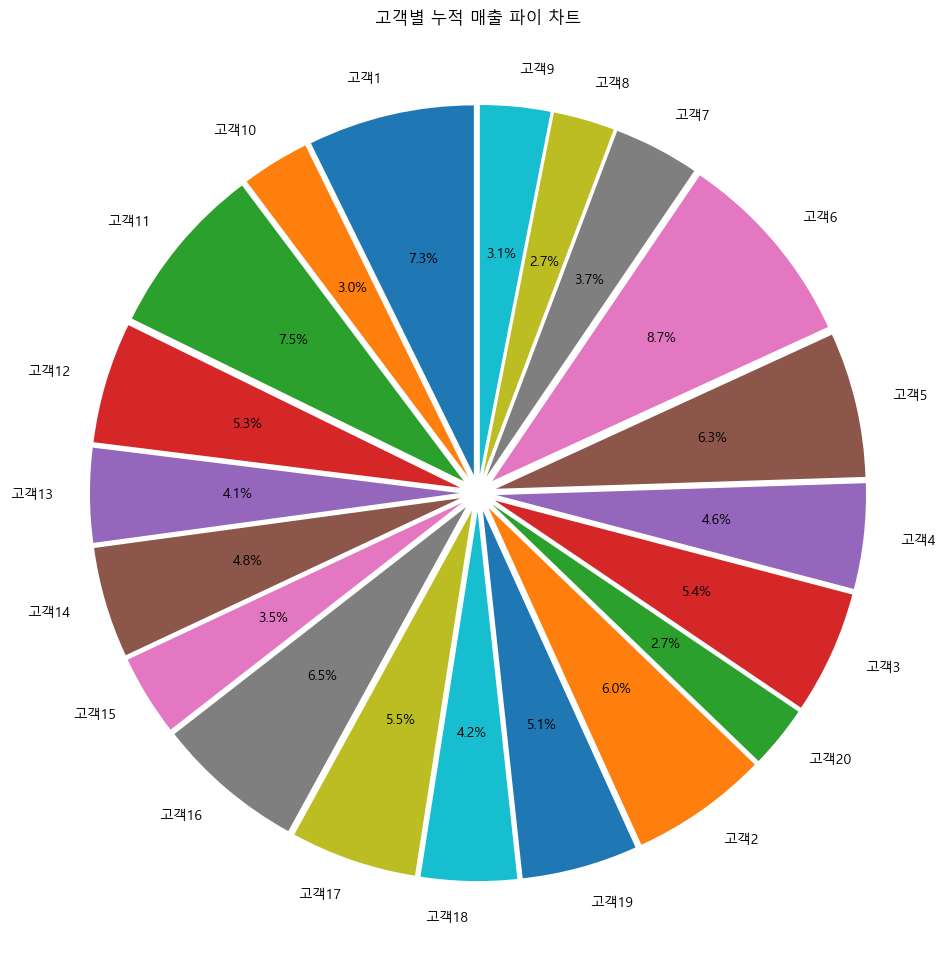

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

class CustomerSalesAnalysis:
    def __init__(self):
        #데이터 생성 0~365 (366개)
        dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
        data = {
            'customer':[f'고객{random.randint(1,20)}' for _ in dates],
            'order_date':dates,
            'products':[f'상품{random.randint(1,20)}' for _ in dates],
            'count':[random.randint(1,10) for _ in dates],
            'price': np.random.choice(range(5000, 20001, 1000), size=len(dates))
        }
        self.df = pd.DataFrame(data)
        self.df['total_sales'] = self.df['count'] * self.df['price']

        
    def month_sales(self):
        month_data = self.df.groupby(self.df['order_date'].dt.to_period('M'))['total_sales'].sum()
        months = [str(month) for month in month_data.index]
        sales = month_data.values/10000
        
        plt.figure(figsize=(12, 6)) # 간격 크기
        plt.bar(months, sales, color='green')
        plt.title('월별 매출 총합 막대 그래프')
        plt.xlabel('월')
        plt.ylabel('매출(만원)')
        plt.show()
    
    def customer_amount(self):
        customer_data = self.df.groupby('customer')['total_sales'].sum()
        explode_values = [0.05] * len(customer_data)  # 0.05만큼 모든 조각 분리

        plt.figure(figsize=(12, 12)) # 간격 크기
        plt.pie(customer_data.values,labels=customer_data.index,autopct = '%.1f%%', startangle = 90,explode=explode_values)
        plt.title('고객별 누적 매출 파이 차트')
        plt.show()

a = CustomerSalesAnalysis()
a.month_sales()
a.customer_amount()